In [133]:
#final file for streamlitapp
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pickle

In [134]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [140]:
!pip install streamlit
!pip install pycaret
!pip install shap

You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.



^C


You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.


In [157]:
%matplotlib inline

In [135]:
df = pd.read_csv('covid_education_impact.csv')

In [127]:
df['submission_date'] = df['submission_date'].str.replace("-","").astype(int)

In [5]:
df.head()

submission_id  submission_date  gender                 age  \
0  4570534489882624         20210317  Female   Over 45 years old   
1  6440166989496320         20210329    Male  26 to 35 years old   
2  5001167808757760         20210318  Female  26 to 35 years old   
3  5524933164924928         20210324    Male  36 to 45 years old   
4  5032515751641088         20210318  Female   Over 45 years old   

                          geography  \
0               Suburban/Peri-urban   
1               Suburban/Peri-urban   
2  City center or metropolitan area   
3               Suburban/Peri-urban   
4               Suburban/Peri-urban   

                                 financial_situation  \
0  I can afford food and regular expenses, but no...   
1          I cannot afford enough food for my family   
2  I can comfortably afford food, clothes, and fu...   
3                I can afford food, but nothing else   
4  I can afford food and regular expenses, but no...   

                                education  \
0  University or college degree completed   
1  University or college degree completed   
2  University or college degree completed   
3  University or college degree completed   
4  University or college degree completed   

                                   employment_status submission_state  \
0                                    I am unemployed          Miranda   
1                                    I am unemployed          Miranda   
2  I work full-time, either as an employee or sel...          Miranda   
3  I work full-time, either as an employee or sel...          Miranda   
4                                    I am unemployed          Miranda   

   are_there_children_0_to_2_yrs_out_of_educational_system  ...  \
0                                                  0        ...   
1                                                  0        ...   
2                                                  1        ...   
3                                                  0        ...   
4                                                  0        ...   

   are_children_3_to_17_yrs_dealing_with_irregular_school_activity  \
0                                                  0                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   are_children_being_teached_by_unqualified_people  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 1   
4                                                 0   

   did_teachers_leave_the_educational_system  \
0                                          0   
1                                          1   
2                                          1   
3                                          1   
4                                          1   

   do_school_and_the_teachers_have_internet_connection  \
0                                                  1     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   do_children_have_internet_connection  \
0                                     1   
1                                     1   
2                                     1   
3                                     1   
4                                     1   

  do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity  \
0                                                  0                      
1                                                  1                      
2                                     

In [143]:
df.columns

Index(['submission_id', 'submission_date', 'gender', 'age', 'geography',
       'financial_situation', 'education', 'employment_status',
       'submission_state',
       'are_there_children_0_to_2_yrs_out_of_educational_system',
       'were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school',
       'are_there_children_who_stopped_enrolling_in_primary_education',
       'are_there_children_who_stopped_enrolling_in_secondary_education',
       'are_children_attending_face_to_face_classes',
       'can_children_observe_deterioration_of_basic_services_of_school',
       'do_children_3_and_17_yrs_receive_regular_school_meals',
       'are_there_teachers_at_scheduled_class_hours',
       'are_children_3_to_17_yrs_dealing_with_irregular_school_activity',
       'are_children_being_teached_by_unqualified_people',
       'did_teachers_leave_the_educational_system',
       'do_school_and_the_teachers_have_internet_connection',
       'do_children_have_internet_connection',
       'do_

In [97]:
df.dtypes

submission_id                                                              int64
submission_date                                                           object
gender                                                                    object
age                                                                       object
geography                                                                 object
financial_situation                                                       object
education                                                                 object
employment_status                                                         object
submission_state                                                          object
are_there_children_0_to_2_yrs_out_of_educational_system                    int64
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school            int64
are_there_children_who_stopped_enrolling_in_primary_education              int64
are_there_children_who_stopp

In [5]:
df

submission_id  submission_date  gender  age  geography  \
0               116                7       0    4          3   
1              3811               19       1    1          3   
2               958                8       0    1          0   
3              2000               14       1    2          3   
4              1022                8       0    4          3   
...             ...              ...     ...  ...        ...   
4431           1426               12       0    4          3   
4432           3974                9       0    4          2   
4433           1415               15       1    0          3   
4434           3271                3       0    4          3   
4435           1100               20       1    2          2   

      financial_situation  education  employment_status  submission_state  \
0                       0         15                  6                13   
1                       5         15                  6                13   
2                       3         15                  8                13   
3                       1         15                  8                13   
4                       0         15                  6                13   
...                   ...        ...                ...               ...   
4431                    1         15                  8                 1   
4432                    1          6                  9                 1   
4433                    2         14                  2                 1   
4434                    0         15                  8                 1   
4435                    0         14                  9                 1   

      are_there_children_0_to_2_yrs_out_of_educational_system  ...  \
0                                                     0        ...   
1                                                     0        ...   
2                                                     1        ...   
3                                                     0        ...   
4                                                     0        ...   
...                                                 ...        ...   
4431                                                  0        ...   
4432                                                  0        ...   
4433                                                  1        ...   
4434                                                  1        ...   
4435                                                  0        ...   

      are_children_3_to_17_yrs_dealing_with_irregular_school_activity  \
0                                                     0                 
1                                                     1                 
2                                                     1                 
3                                                     1                 
4                                                     1                 
...                                                 ...                 
4431                                                  1                 
4432                                                  0                 
4433                                                  1                 
4434                                                  0                 
4435                                                  1                 

      are_children_being_teached_by_unqualified_people  \
0                                                    0   
1                                                    0   
2                                                    1   
3                                                    1   
4                                                    0   
...                                                ...   
4431                                                 1   
4432                                                 0   
4433                                                 0   
4434          

In [66]:
df.drop('submission_id', axis = 1, inplace = True)

In [136]:
df["financial_situation"] = df['financial_situation'].str.replace(' ', '').astype(str)
df["submission_date"] = df['submission_date'].str.replace('-', '').astype(str)

In [106]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Female',0],['Male',1],['Non-Binary',1],['Rural',0],['Suburban/Peri-urban',1],['City center or metropolitan area',1],['%Icanafford',1],['%Icannotafford',0],['%Icancomfortably',1],['%NotAvailable',0],['%Prefernottoanswer',0]]
y=df[['does_home_shows_severe_deficit_of_electricity']].astype(int)
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [103]:
df

submission_id submission_date  gender                 age  \
0     4570534489882624      2021-03-17  Female   Over 45 years old   
1     6440166989496320      2021-03-29    Male  26 to 35 years old   
2     5001167808757760      2021-03-18  Female  26 to 35 years old   
3     5524933164924928      2021-03-24    Male  36 to 45 years old   
4     5032515751641088      2021-03-18  Female   Over 45 years old   
...                ...             ...     ...                 ...   
4431  5229259428986880      2021-03-22  Female   Over 45 years old   
4432  6520660045332480      2021-03-19  Female   Over 45 years old   
4433  5222701550796800      2021-03-25    Male  16 to 25 years old   
4434  6150639704080384      2021-03-13  Female   Over 45 years old   
4435  5073215465717760      2021-03-30    Male  36 to 45 years old   

                             geography  \
0                  Suburban/Peri-urban   
1                  Suburban/Peri-urban   
2     City center or metropolitan area   
3                  Suburban/Peri-urban   
4                  Suburban/Peri-urban   
...                                ...   
4431               Suburban/Peri-urban   
4432                             Rural   
4433               Suburban/Peri-urban   
4434               Suburban/Peri-urban   
4435                             Rural   

                                    financial_situation  \
0     I can afford food and regular expenses, but no...   
1             I cannot afford enough food for my family   
2     I can comfortably afford food, clothes, and fu...   
3                   I can afford food, but nothing else   
4     I can afford food and regular expenses, but no...   
...                                                 ...   
4431                I can afford food, but nothing else   
4432                I can afford food, but nothing else   
4433  I can afford food, regular expenses, and cloth...   
4434  I can afford food and regular expenses, but no...   
4435  I can afford food and regular expenses, but no...   

                                         education  \
0           University or college degree completed   
1           University or college degree completed   
2           University or college degree completed   
3           University or college degree completed   
4           University or college degree completed   
...                                            ...   
4431        University or college degree completed   
4432                      Primary school completed   
4433  Technical school diploma or degree completed   
4434        University or college degree completed   
4435  Technical school diploma or degree completed   

                                      employment_status submission_state  \
0                                       I am unemployed          Miranda   
1                                       I am unemployed          Miranda   
2     I work full-time, either as an employee or sel...          Miranda   
3     I work full-time, either as an employee or sel...          Miranda   
4                                       I am unemployed          Miranda   
...                                                 ...              ...   
4431  I work full-time, either as an employee or sel...       Anzoátegui   
4432  I work part-time, either as an employee or sel...       Anzoátegui   
4433                I am a student and I work part-time       Anzoátegui   
4434  I work full-time, either as an employee or sel...       Anzoátegui   
4435  I work part-time, either as an employee or sel...       Anzoátegui   

      are_there_children_0_to_2_yrs_out_of_educational_system  ...  \
0                                                     0        ...   
1                                                     0        ...   
2                                                     1        ...   
3                                                     0        ...   
4                                         

In [137]:
m = df['financial_situation'].str.startswith('Icanafford')
d = df['financial_situation'].str.startswith('Icannotafford')
e = df['financial_situation'].str.startswith('Icancomfortably')
f = df['financial_situation'].str.startswith('Prefernottoanswer')
g = df['financial_situation'].str.startswith('NotAvailable')
i = df['gender'].str.startswith('Prefer not to answer')
j = df['gender'].str.startswith('Not Available')
l = df['geography'].str.startswith('Not Available')
df = df.replace('Female',0)
df = df.replace('Male',1)
df = df.replace('Non-Binary',1)
df = df.replace('Rural',0)
df = df.replace('Suburban/Peri-urban',1)
df = df.replace('City center or metropolitan area',1)
df['financial_situation']=np.where(m,1,df['financial_situation'])
df['financial_situation']=np.where(e,1,df['financial_situation'])
df['financial_situation']=np.where(d,0,df['financial_situation'])
df['financial_situation']=np.where(f,0,df['financial_situation'])
df['financial_situation']=np.where(g,0,df['financial_situation'])
df['gender']=np.where(i,0,df['gender'])
df['gender']=np.where(j,0,df['gender'])
df['geography']=np.where(l,0,df['geography'])

In [138]:
df['gender']=df['gender'].astype(float)
df['geography']=df['geography'].astype(float)
df['financial_situation']=df['financial_situation'].astype(float)
df['submission_date']=df['submission_date'].astype(float)

In [9]:
df.dtypes

submission_id                                                              int64
submission_date                                                           object
gender                                                                     int32
age                                                                       object
geography                                                                  int32
financial_situation                                                        int32
education                                                                 object
employment_status                                                         object
submission_state                                                          object
are_there_children_0_to_2_yrs_out_of_educational_system                    int64
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school            int64
are_there_children_who_stopped_enrolling_in_primary_education              int64
are_there_children_who_stopp

In [127]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['geography','gender','financial_situation','do_children_have_internet_connection','does_home_shows_severe_deficit_of_electricity'])

LabelEncoder()

In [139]:

X=df[['geography','gender','financial_situation','do_children_have_internet_connection']].astype(int)
y=df[['does_home_shows_severe_deficit_of_electricity']].astype(int)

In [41]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [141]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)

In [142]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7077385424492862


In [143]:
import pickle
pickle.dump(lr,open('linear.pkl','wb'))

In [160]:
values = df['financial_situation'].value_counts()
labels = df['financial_situation'].unique().tolist()

values1 = df['geography'].value_counts()
labels1 = df['geography'].unique().tolist()

([<matplotlib.patches.Wedge at 0x1f43aaea370>,
 [Text(-1.2004700737600216, 1.8436028862004445, '1.0'),
  Text(1.2004702463705754, -1.8436027738043168, '0.0')])

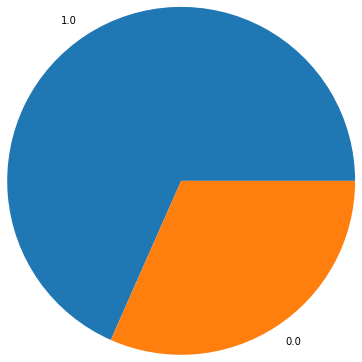

In [164]:
plt.pie(values, labels=labels, radius=2)

([<matplotlib.patches.Wedge at 0x1f43bb013d0>,
 [Text(-1.5188570763719125, 1.5915631252184022, '1.0'),
  Text(1.5188570763719123, -1.5915631252184022, '0.0')])

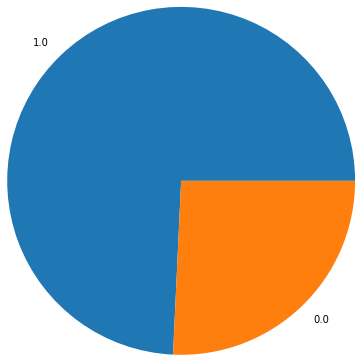

In [165]:
plt.pie(values1, labels=labels1, radius=2)

In [158]:
plt.show()
print(values)

1.0    3033
0.0    1403
Name: financial_situation, dtype: int64


In [144]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\Users\elise\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [145]:
y_pred = logisticRegr.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.7077385424492862


In [147]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(logisticRegr, pickle_out)
pickle_out.close()

In [7]:
X = df.values[:, 0:4436]
Y = df.values[:,26]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
X

submission_id  geography  gender  financial_situation  \
0     4570534489882624          1       0                    1   
1     6440166989496320          1       1                    0   
2     5001167808757760          2       0                    1   
3     5524933164924928          1       1                    1   
4     5032515751641088          1       0                    1   
...                ...        ...     ...                  ...   
4431  5229259428986880          1       0                    1   
4432  6520660045332480          0       0                    1   
4433  5222701550796800          1       1                    1   
4434  6150639704080384          1       0                    1   
4435  5073215465717760          0       1                    1   

      do_children_have_internet_connection  
0                                        1  
1                                        1  
2                                        1  
3                                        1  
4                                        1  
...                                    ...  
4431                                     1  
4432                                     0  
4433                                     1  
4434                                     1  
4435                                     1  

[4436 rows x 5 columns]

In [13]:
y

0       0
1       0
2       1
3       0
4       0
       ..
4431    0
4432    0
4433    0
4434    0
4435    1
Name: does_home_shows_severe_deficit_of_electricity, Length: 4436, dtype: int64

In [19]:
svm = SVC()

In [20]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.709992486851991

In [37]:
X.shape,y.shape

((4436, 4), (4436,))

In [40]:
shape = df.shape
print(shape[1])

27


In [52]:
X

geography  gender  financial_situation  \
0             1       0                    1   
1             1       1                    0   
2             2       0                    1   
3             1       1                    1   
4             1       0                    1   
...         ...     ...                  ...   
4431          1       0                    1   
4432          0       0                    1   
4433          1       1                    1   
4434          1       0                    1   
4435          0       1                    1   

      do_children_have_internet_connection  
0                                        1  
1                                        1  
2                                        1  
3                                        1  
4                                        1  
...                                    ...  
4431                                     1  
4432                                     0  
4433                                     1  
4434                                     1  
4435                                     1  

[4436 rows x 4 columns]

In [53]:
X_test

geography  gender  financial_situation  \
579           1       1                    1   
256           1       0                    1   
3034          2       0                    1   
476           1       1                    1   
3245          0       1                    0   
...         ...     ...                  ...   
3304          2       0                    0   
827           1       1                    0   
3035          2       0                    1   
319           0       0                    0   
4379          2       0                    1   

      do_children_have_internet_connection  
579                                      1  
256                                      1  
3034                                     1  
476                                      1  
3245                                     0  
...                                    ...  
3304                                     1  
827                                      0  
3035                                     0  
319                                      1  
4379                                     1  

[444 rows x 4 columns]

In [10]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = logisticRegr.predict(X_test)

In [61]:
print(y_pred)


[0 0 0 ... 0 0 0]


In [12]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7294860234445446


In [14]:
y_pred.predict([['Rural','Icanafford','Female',0]])

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [47]:
X_train = X_train.drop(columns='submission_id').copy()

KeyError: "['submission_id'] not found in axis"

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import joblib

X=df[['geography','gender','financial_situation','do_children_have_internet_connection']]
y=df['does_home_shows_severe_deficit_of_electricity']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=11)

def model(X, y):
    X = X.copy()
    y = y.copy()
    pipeline = Pipeline(steps=[['scaler', MinMaxScaler()],
                               ['feature_selection', SelectKBest(score_func=mutual_info_classif)],
                               ['classifier', LogisticRegression(random_state=11, max_iter=1000)]])
    
    param_grid = {'feature_selection__k': range(1, X.shape[1]),
                  'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               scoring='accuracy',
                               n_jobs=-1,
                               cv=3)
    
    grid_search.fit(X, y)
    
    return grid_search


pipeline = Pipeline(steps=[['scaler', MinMaxScaler()],
                           ['feature_selection', SelectKBest(score_func=mutual_info_classif,
                                                             k=3)],
                           ['classifier', LogisticRegression(random_state=11,
                                                             max_iter=1000,
                                                             C=1000)]])

#Refitting the pipeline to the data to find features selected
pipeline.fit(X_train, y_train)
feature_selection = (pipeline['feature_selection']).scores_
feature_scores = {key: value for key,value in zip(X_train.columns, (np.round(pipeline['feature_selection'].scores_,2)))}

#Fitting the final model from GridSearchCV
covid_model = model(X_train, y_train)
joblib.dump(covid_model, 'covid_.pkl')

print(f'Best params: {covid_model.best_params_}\nBest score: {covid_model.best_score_}\nFeatures scores: {feature_scores}')


Best params: {'classifier__C': 0.001, 'feature_selection__k': 1}
Best score: 0.7154309515336049
Features scores: {'geography': 0.0, 'gender': 0.0, 'financial_situation': 0.0, 'do_children_have_internet_connection': 0.02}


In [14]:
df

submission_id  submission_date  gender  age  geography  \
0               116                7       0    4          3   
1              3811               19       1    1          3   
2               958                8       0    1          0   
3              2000               14       1    2          3   
4              1022                8       0    4          3   
...             ...              ...     ...  ...        ...   
4431           1426               12       0    4          3   
4432           3974                9       0    4          2   
4433           1415               15       1    0          3   
4434           3271                3       0    4          3   
4435           1100               20       1    2          2   

      financial_situation  education  employment_status  submission_state  \
0                       0         15                  6                13   
1                       5         15                  6                13   
2                       3         15                  8                13   
3                       1         15                  8                13   
4                       0         15                  6                13   
...                   ...        ...                ...               ...   
4431                    1         15                  8                 1   
4432                    1          6                  9                 1   
4433                    2         14                  2                 1   
4434                    0         15                  8                 1   
4435                    0         14                  9                 1   

      are_there_children_0_to_2_yrs_out_of_educational_system  ...  \
0                                                     0        ...   
1                                                     0        ...   
2                                                     1        ...   
3                                                     0        ...   
4                                                     0        ...   
...                                                 ...        ...   
4431                                                  0        ...   
4432                                                  0        ...   
4433                                                  1        ...   
4434                                                  1        ...   
4435                                                  0        ...   

      are_children_3_to_17_yrs_dealing_with_irregular_school_activity  \
0                                                     0                 
1                                                     1                 
2                                                     1                 
3                                                     1                 
4                                                     1                 
...                                                 ...                 
4431                                                  1                 
4432                                                  0                 
4433                                                  1                 
4434                                                  0                 
4435                                                  1                 

      are_children_being_teached_by_unqualified_people  \
0                                                    0   
1                                                    0   
2                                                    1   
3                                                    1   
4                                                    0   
...                                                ...   
4431                                                 1   
4432                                                 0   
4433                                                 0   
4434          

In [16]:
pd.set_option('display.max_rows', None)

In [18]:
df

submission_id  submission_date  gender  age  geography  \
0               116                7       0    4          3   
1              3811               19       1    1          3   
2               958                8       0    1          0   
3              2000               14       1    2          3   
4              1022                8       0    4          3   
5              2658                5       0    2          0   
6               946               21       0    1          2   
7              3524                4       0    4          3   
8              3638               13       0    4          2   
9              2651               20       1    1          0   
10              692                6       4    0          3   
11             3173                4       0    4          0   
12             3252                0       0    4          0   
13              619                5       1    1          0   
14             1456                8       1    2          3   
15             1534               28       0    0          3   
16             3280                7       0    2          2   
17             3119               19       1    1          0   
18             4378               11       0    1          3   
19             2443                3       0    0          2   
20             1579                3       1    2          0   
21             2694                3       0    4          2   
22              169               18       1    0          2   
23             2156                3       1    2          0   
24             2112                4       0    0          2   
25             1939               70       0    1          0   
26              389                3       1    1          0   
27             1268                3       0    0          0   
28              171                3       0    2          2   
29              936               12       0    0          3   
30              218                6       0    2          0   
31             2657                3       0    1          0   
32             3585               18       0    2          3   
33             3432                4       0    4          2   
34             2951                3       0    1          0   
35             3341                3       0    0          2   
36              547                3       1    0          3   
37             2893               24       1    2          0   
38             1304                9       1    1          2   
39             1627               14       0    1          3   
40             1282               19       1    0          3   
41             1479                4       1    4          0   
42             3431                5       0    1          2   
43             1310                4       1    0          0   
44             1791                5       1    1          3   
45             3485                7       1    0          3   
46              350                9       0    1          3   
47              956               22       1    0          3   
48              387                4       0    2          0   
49             2457               11       0    0          3   
50             2962                8       0    4          3   
51              889                3       0    4          3   
52             1987               19       0    4          0   
53             4102                3       1    1          2   
54              643                3       0    4          0   
55             1584               13       0    4          0   
56             3279               13       0    1          2   
57              935                4       0    2          0   
58             2250               18       0    1          3   
59              787                4       1    4          3   
60              296                5       0    0          0   
61             1854               20  

In [15]:
df['financial_situation']

0       0
1       5
2       3
3       1
4       0
       ..
4431    1
4432    1
4433    2
4434    0
4435    0
Name: financial_situation, Length: 4436, dtype: int32

In [10]:
X_train.dtypes

geography                               int32
gender                                  int32
financial_situation                     int32
do_children_have_internet_connection    int64
dtype: object

In [11]:
X_test.dtypes

geography                               int32
gender                                  int32
financial_situation                     int32
do_children_have_internet_connection    int64
dtype: object

In [12]:
y_train.dtypes

dtype('int64')

In [13]:
y_test.dtypes

dtype('int64')

In [49]:
df.dtypes

submission_id                                                             int64
submission_date                                                           int32
gender                                                                    int64
age                                                                       int32
geography                                                                 int64
financial_situation                                                       int64
education                                                                 int32
employment_status                                                         int32
submission_state                                                          int32
are_there_children_0_to_2_yrs_out_of_educational_system                   int64
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school           int64
are_there_children_who_stopped_enrolling_in_primary_education             int64
are_there_children_who_stopped_enrolling

In [31]:
def model(X, y):
    X = X.copy()
    y = y.copy()
    pipeline = Pipeline(steps=[['scaler', MinMaxScaler()],
                               ['classifier', LogisticRegression(random_state=11, max_iter=1000)]])
    
    param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               scoring='accuracy',
                               n_jobs=-1,
                               cv=3)
    
    grid_search.fit(X, y)
    
    return grid_search

#Dropping sepal width
X_train = X_train.drop(columns='financial_situation').copy()
covid_model1 = model(X_train, y_train)
print(f'Best params: {covid_model1.best_params_}\nBest score: {covid_model1.best_score_}')

Best params: {'classifier__C': 0.001}
Best score: 0.7154309515336049


In [12]:
df.head()

submission_id submission_date  gender                 age  geography  \
0  4570534489882624      2021-03-17       0   Over 45 years old          1   
1  6440166989496320      2021-03-29       1  26 to 35 years old          1   
2  5001167808757760      2021-03-18       0  26 to 35 years old          2   
3  5524933164924928      2021-03-24       1  36 to 45 years old          1   
4  5032515751641088      2021-03-18       0   Over 45 years old          1   

   financial_situation                               education  \
0                    1  University or college degree completed   
1                    0  University or college degree completed   
2                    1  University or college degree completed   
3                    1  University or college degree completed   
4                    1  University or college degree completed   

                                   employment_status submission_state  \
0                                    I am unemployed          Miranda   
1                                    I am unemployed          Miranda   
2  I work full-time, either as an employee or sel...          Miranda   
3  I work full-time, either as an employee or sel...          Miranda   
4                                    I am unemployed          Miranda   

   are_there_children_0_to_2_yrs_out_of_educational_system  ...  \
0                                                  0        ...   
1                                                  0        ...   
2                                                  1        ...   
3                                                  0        ...   
4                                                  0        ...   

   are_children_3_to_17_yrs_dealing_with_irregular_school_activity  \
0                                                  0                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   are_children_being_teached_by_unqualified_people  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 1   
4                                                 0   

   did_teachers_leave_the_educational_system  \
0                                          0   
1                                          1   
2                                          1   
3                                          1   
4                                          1   

   do_school_and_the_teachers_have_internet_connection  \
0                                                  1     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   do_children_have_internet_connection  \
0                                     1   
1                                     1   
2                                     1   
3                                     1   
4                                     1   

  do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity  \
0                                                  0                      
1                                                  1                      
2                                                  0                      
3                                                  0                      
4                                                  1                      

  does_home_shows_severe_deficit_of_electricity  \
0                                             0   
1                                             0   
2                                            

In [207]:
y=y.astype('int')
X=X.astype('int')

ValueError: invalid literal for int() with base 10: 'Female'

In [216]:
df = df.replace('Female',0)
df = df.replace('Male',1)
df = df.replace('Prefernottoanswer',0)
df = df.replace('Not Available',0)
df = df.replace('Non-Binary',3)
df = df.replace('Rural',0)
df = df.replace('Suburban/Peri-urban',1)
df = df.replace('City center or metropolitan area',2)
df = df.replace('Over 45 years old',5)
df = df.replace('36 to 45 years old',4)
df = df.replace('26 to 35 years old',3)
df = df.replace('16 to 25 years old',2)
df = df.replace('Under 16',1)
#df = df.drop(columns=['education','employment_status','submission_state','do_children_3_and_17_yrs_receive_regular_school_meals','are_there_teachers_at_scheduled_class_hours'])
#,employment_status','submission_state'])

In [165]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,

test_size=0.2, random_state=10)

In [166]:
!pip3 install -U scikit-learn scipy matplotlib

  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached fonttools-4.32.0-py3-none-any.whl (900 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\elise\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.


In [168]:
!pip install sklearn

You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.


In [170]:
!pip install scikit-learn --upgrade

You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.


In [14]:
#from sklearn.linear_model import LogisticRegression

In [173]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.80)

In [174]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [175]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7142857142857143

In [177]:
pred_train = model.predict(X_train)
accuracy_score(y_train,pred_train)

0.7204058624577226

### Useed a CLF model below

In [169]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_test)
accuracy_score(y_test,pred_cv)
#ending of prediciting portion that works for this model

0.7252252252252253

In [170]:
clf_model = LogisticRegression()

clf_model.fit(X_train, y_train)

LogisticRegression()

In [171]:
y_pred = clf_model.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7263513513513513


In [178]:
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [17]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\elise\anaconda3\python.exe -m pip install --upgrade pip' command.


In [154]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(geography,financial_situation):   
 
    # Pre-processing user input    
    if geography == "Suburban/Peri-urban":
        geography = 1
    if geography == "City center or metropolitan area":
        geography = 2
    if geography == "Rural":
        geography = 0
    else:
        geography = 0
 
    if gender == "Female":
        gender = 0
    if gender == "Male":
        gender = 1
    if gender == "Non-Binary":
        gender = 2
    else:
        gender = 0
    
    if financial_situation == "^Icanafford":
        financial_situation = 1
    if financial_situation == "^Icannotafford":
        financial_situation = 0
    if financial_situation == "^Icancomfortably":
        financial_situation = 1
    if financial_situation == "^Prefernottoanswer":
        financial_situation = 0
    else:
        financial_situation = 0
 
    # Making predictions 
    prediction = classifier.predict( 
        [[geography, financial_situation,gender]])
     
    if prediction == 0:
        pred = 'Your home shows severe electricity deficit'
    if prediction == 1:
        pred = 'Your home shows severe electricity efficiency'
    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    gender = st.selectbox('Gender',("Male","Female"))
    financial_situation = st.selectbox('Financial Situtation',("Icanafford","Icannotafford","Prefernottoanswer")) 
    geography = st.selectbox('Geography',("Suburban","City center or metropolitan area","Rural"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(gender, financial_situation, geography) 
        st.success('Your current electricity status is {}'.format(result))
        print(LoanAmount)
     
if __name__=='__main__': 
    main()

Overwriting app.py


In [70]:
df['financial_situation'] = np.where(df['financial_situation'] == '%I can afford',1,0)

In [71]:
df['financial_situation']

0       0
1       0
2       0
3       0
4       0
       ..
4431    0
4432    0
4433    0
4434    0
4435    0
Name: financial_situation, Length: 4436, dtype: int32

In [54]:
x = df.drop(['financial_situation'], axis = 1) # we will use all columns except 'class'
#features (x) is just everything available except our class
y = df['financial_situation'] # this is our target value

In [55]:
x.shape, y.shape

((4436, 21), (4436,))

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.80)

In [58]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((887, 21), (3549, 21), (887,), (3549,))

In [97]:
xVar =['financial_situation'] + ['geography']+['gender'] 
yVar = df.iloc[:,20]
df2 = df[xVar]

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


In [102]:
X_train, X_test, y_train, y_test = train_test_split(df2, yVar, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3548, 3) (3548,)
(888, 3) (888,)


In [ ]:
df['I can afford'] = w['female'].map({'female': 1, 'male': 0})

In [33]:
df

submission_id  submission_date  gender                 age  \
0     4570534489882624         20210317  Female   Over 45 years old   
1     6440166989496320         20210329    Male  26 to 35 years old   
2     5001167808757760         20210318  Female  26 to 35 years old   
3     5524933164924928         20210324    Male  36 to 45 years old   
4     5032515751641088         20210318  Female   Over 45 years old   
...                ...              ...     ...                 ...   
4431  5229259428986880         20210322  Female   Over 45 years old   
4432  6520660045332480         20210319  Female   Over 45 years old   
4433  5222701550796800         20210325    Male  16 to 25 years old   
4434  6150639704080384         20210313  Female   Over 45 years old   
4435  5073215465717760         20210330    Male  36 to 45 years old   

                             geography  \
0                  Suburban/Peri-urban   
1                  Suburban/Peri-urban   
2     City center or metropolitan area   
3                  Suburban/Peri-urban   
4                  Suburban/Peri-urban   
...                                ...   
4431               Suburban/Peri-urban   
4432                             Rural   
4433               Suburban/Peri-urban   
4434               Suburban/Peri-urban   
4435                             Rural   

                                    financial_situation  \
0     I can afford food and regular expenses, but no...   
1             I cannot afford enough food for my family   
2     I can comfortably afford food, clothes, and fu...   
3                   I can afford food, but nothing else   
4     I can afford food and regular expenses, but no...   
...                                                 ...   
4431                I can afford food, but nothing else   
4432                I can afford food, but nothing else   
4433  I can afford food, regular expenses, and cloth...   
4434  I can afford food and regular expenses, but no...   
4435  I can afford food and regular expenses, but no...   

                                         education  \
0           University or college degree completed   
1           University or college degree completed   
2           University or college degree completed   
3           University or college degree completed   
4           University or college degree completed   
...                                            ...   
4431        University or college degree completed   
4432                      Primary school completed   
4433  Technical school diploma or degree completed   
4434        University or college degree completed   
4435  Technical school diploma or degree completed   

                                      employment_status submission_state  \
0                                       I am unemployed          Miranda   
1                                       I am unemployed          Miranda   
2     I work full-time, either as an employee or sel...          Miranda   
3     I work full-time, either as an employee or sel...          Miranda   
4                                       I am unemployed          Miranda   
...                                                 ...              ...   
4431  I work full-time, either as an employee or sel...       Anzoátegui   
4432  I work part-time, either as an employee or sel...       Anzoátegui   
4433                I am a student and I work part-time       Anzoátegui   
4434  I work full-time, either as an employee or sel...       Anzoátegui   
4435  I work part-time, either as an employee or sel...       Anzoátegui   

      are_there_children_0_to_2_yrs_out_of_educational_system  ...  \
0                                                     0        ...   
1                                                     0        ...   
2                                                     1        ...   
3                                                     0        ...   
4                             

In [60]:
df.loc[df["gender"] == "Male", "gender"] = 1
df.loc[df["gender"] == "Female", "gender"] = 0

In [46]:
df

submission_id submission_date gender                 age  \
0     4570534489882624      2021-03-17      0   Over 45 years old   
1     6440166989496320      2021-03-29      1  26 to 35 years old   
2     5001167808757760      2021-03-18      0  26 to 35 years old   
3     5524933164924928      2021-03-24      1  36 to 45 years old   
4     5032515751641088      2021-03-18      0   Over 45 years old   
...                ...             ...    ...                 ...   
4431  5229259428986880      2021-03-22      0   Over 45 years old   
4432  6520660045332480      2021-03-19      0   Over 45 years old   
4433  5222701550796800      2021-03-25      1  16 to 25 years old   
4434  6150639704080384      2021-03-13      0   Over 45 years old   
4435  5073215465717760      2021-03-30      1  36 to 45 years old   

                             geography  \
0                  Suburban/Peri-urban   
1                  Suburban/Peri-urban   
2     City center or metropolitan area   
3                  Suburban/Peri-urban   
4                  Suburban/Peri-urban   
...                                ...   
4431               Suburban/Peri-urban   
4432                             Rural   
4433               Suburban/Peri-urban   
4434               Suburban/Peri-urban   
4435                             Rural   

                                    financial_situation  \
0     I can afford food and regular expenses, but no...   
1             I cannot afford enough food for my family   
2     I can comfortably afford food, clothes, and fu...   
3                   I can afford food, but nothing else   
4     I can afford food and regular expenses, but no...   
...                                                 ...   
4431                I can afford food, but nothing else   
4432                I can afford food, but nothing else   
4433  I can afford food, regular expenses, and cloth...   
4434  I can afford food and regular expenses, but no...   
4435  I can afford food and regular expenses, but no...   

                                         education  \
0           University or college degree completed   
1           University or college degree completed   
2           University or college degree completed   
3           University or college degree completed   
4           University or college degree completed   
...                                            ...   
4431        University or college degree completed   
4432                      Primary school completed   
4433  Technical school diploma or degree completed   
4434        University or college degree completed   
4435  Technical school diploma or degree completed   

                                      employment_status submission_state  \
0                                       I am unemployed          Miranda   
1                                       I am unemployed          Miranda   
2     I work full-time, either as an employee or sel...          Miranda   
3     I work full-time, either as an employee or sel...          Miranda   
4                                       I am unemployed          Miranda   
...                                                 ...              ...   
4431  I work full-time, either as an employee or sel...       Anzoátegui   
4432  I work part-time, either as an employee or sel...       Anzoátegui   
4433                I am a student and I work part-time       Anzoátegui   
4434  I work full-time, either as an employee or sel...       Anzoátegui   
4435  I work part-time, either as an employee or sel...       Anzoátegui   

      are_there_children_0_to_2_yrs_out_of_educational_system  ...  \
0                                                     0        ...   
1                                                     0        ...   
2                                                     1        ...   
3                                                     0        ...   
4                                                     

In [37]:
df['gender']

0       0
1       0
2       0
3       0
4       0
       ..
4431    0
4432    0
4433    0
4434    0
4435    0
Name: gender, Length: 4436, dtype: int64

In [21]:
df.drop(columns=['submission_date'])

submission_id  gender                 age  \
0     4570534489882624  Female   Over 45 years old   
1     6440166989496320    Male  26 to 35 years old   
2     5001167808757760  Female  26 to 35 years old   
3     5524933164924928    Male  36 to 45 years old   
4     5032515751641088  Female   Over 45 years old   
...                ...     ...                 ...   
4431  5229259428986880  Female   Over 45 years old   
4432  6520660045332480  Female   Over 45 years old   
4433  5222701550796800    Male  16 to 25 years old   
4434  6150639704080384  Female   Over 45 years old   
4435  5073215465717760    Male  36 to 45 years old   

                             geography  \
0                  Suburban/Peri-urban   
1                  Suburban/Peri-urban   
2     City center or metropolitan area   
3                  Suburban/Peri-urban   
4                  Suburban/Peri-urban   
...                                ...   
4431               Suburban/Peri-urban   
4432                             Rural   
4433               Suburban/Peri-urban   
4434               Suburban/Peri-urban   
4435                             Rural   

                                    financial_situation  \
0     I can afford food and regular expenses, but no...   
1             I cannot afford enough food for my family   
2     I can comfortably afford food, clothes, and fu...   
3                   I can afford food, but nothing else   
4     I can afford food and regular expenses, but no...   
...                                                 ...   
4431                I can afford food, but nothing else   
4432                I can afford food, but nothing else   
4433  I can afford food, regular expenses, and cloth...   
4434  I can afford food and regular expenses, but no...   
4435  I can afford food and regular expenses, but no...   

                                         education  \
0           University or college degree completed   
1           University or college degree completed   
2           University or college degree completed   
3           University or college degree completed   
4           University or college degree completed   
...                                            ...   
4431        University or college degree completed   
4432                      Primary school completed   
4433  Technical school diploma or degree completed   
4434        University or college degree completed   
4435  Technical school diploma or degree completed   

                                      employment_status submission_state  \
0                                       I am unemployed          Miranda   
1                                       I am unemployed          Miranda   
2     I work full-time, either as an employee or sel...          Miranda   
3     I work full-time, either as an employee or sel...          Miranda   
4                                       I am unemployed          Miranda   
...                                                 ...              ...   
4431  I work full-time, either as an employee or sel...       Anzoátegui   
4432  I work part-time, either as an employee or sel...       Anzoátegui   
4433                I am a student and I work part-time       Anzoátegui   
4434  I work full-time, either as an employee or sel...       Anzoátegui   
4435  I work part-time, either as an employee or sel...       Anzoátegui   

      are_there_children_0_to_2_yrs_out_of_educational_system  \
0                                                     0         
1                                                     0         
2                                                     1         
3                                                     0         
4                                                     0         
...                                                 ...         
4431                                                  0         
4432                                                  0         

In [4]:
df.dtypes

submission_id                                                              int64
gender                                                                    object
age                                                                       object
geography                                                                 object
financial_situation                                                       object
education                                                                 object
employment_status                                                         object
submission_state                                                          object
are_there_children_0_to_2_yrs_out_of_educational_system                    int64
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school            int64
are_there_children_who_stopped_enrolling_in_primary_education              int64
are_there_children_who_stopped_enrolling_in_secondary_education            int64
are_children_attending_face_

In [25]:
df1 = df[['gender','age','geography','financial_situation','submission_state']]

In [26]:
df1

gender                 age                         geography  \
submission_date                                                                 
2021-03-17       Female   Over 45 years old               Suburban/Peri-urban   
2021-03-29         Male  26 to 35 years old               Suburban/Peri-urban   
2021-03-18       Female  26 to 35 years old  City center or metropolitan area   
2021-03-24         Male  36 to 45 years old               Suburban/Peri-urban   
2021-03-18       Female   Over 45 years old               Suburban/Peri-urban   
...                 ...                 ...                               ...   
2021-03-22       Female   Over 45 years old               Suburban/Peri-urban   
2021-03-19       Female   Over 45 years old                             Rural   
2021-03-25         Male  16 to 25 years old               Suburban/Peri-urban   
2021-03-13       Female   Over 45 years old               Suburban/Peri-urban   
2021-03-30         Male  36 to 45 years old                             Rural   

                                               financial_situation  \
submission_date                                                      
2021-03-17       I can afford food and regular expenses, but no...   
2021-03-29               I cannot afford enough food for my family   
2021-03-18       I can comfortably afford food, clothes, and fu...   
2021-03-24                     I can afford food, but nothing else   
2021-03-18       I can afford food and regular expenses, but no...   
...                                                            ...   
2021-03-22                     I can afford food, but nothing else   
2021-03-19                     I can afford food, but nothing else   
2021-03-25       I can afford food, regular expenses, and cloth...   
2021-03-13       I can afford food and regular expenses, but no...   
2021-03-30       I can afford food and regular expenses, but no...   

                submission_state  
submission_date                   
2021-03-17               Miranda  
2021-03-29               Miranda  
2021-03-18               Miranda  
2021-03-24               Miranda  
2021-03-18               Miranda  
...                          ...  
2021-03-22            Anzoátegui  
2021-03-19            Anzoátegui  
2021-03-25            Anzoátegui  
2021-03-13            Anzoátegui  
2021-03-30            Anzoátegui  

[4436 rows x 5 columns]

In [8]:
df['geography'].isnull().sum()

0

In [10]:
df['financial_situation'].isnull().sum()

0

In [5]:
df.columns

Index(['submission_id', 'gender', 'age', 'geography', 'financial_situation',
       'education', 'employment_status', 'submission_state',
       'are_there_children_0_to_2_yrs_out_of_educational_system',
       'were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school',
       'are_there_children_who_stopped_enrolling_in_primary_education',
       'are_there_children_who_stopped_enrolling_in_secondary_education',
       'are_children_attending_face_to_face_classes',
       'can_children_observe_deterioration_of_basic_services_of_school',
       'do_children_3_and_17_yrs_receive_regular_school_meals',
       'are_there_teachers_at_scheduled_class_hours',
       'are_children_3_to_17_yrs_dealing_with_irregular_school_activity',
       'are_children_being_teached_by_unqualified_people',
       'did_teachers_leave_the_educational_system',
       'do_school_and_the_teachers_have_internet_connection',
       'do_children_have_internet_connection',
       'do_children_3_to_17_yrs_miss_

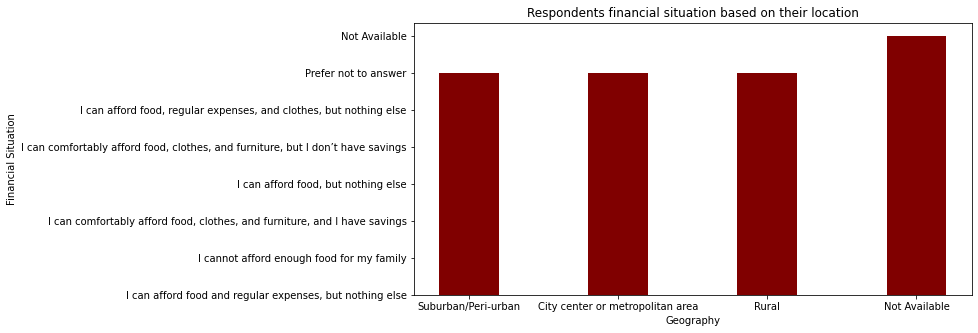

In [12]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
geography = df1['geography']
financial_situation = df1['financial_situation']
plt.bar(geography, financial_situation, color ='maroon',
width = 0.4)

plt.xlabel("Geography")
plt.ylabel("Financial Situation")
plt.title("Respondents financial situation based on their location")
plt.show()


<AxesSubplot:>

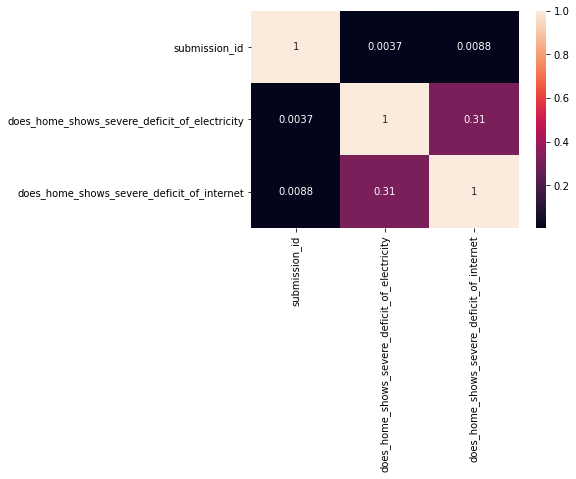

In [17]:
corr = df.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

In [20]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436 entries, 2021-03-17 to 2021-03-30
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   geography            4436 non-null   object
 1   financial_situation  4436 non-null   object
dtypes: object(2)
memory usage: 104.0+ KB


In [6]:
geography = pd.get_dummies(df1['geography'], drop_first=True)
financial_situation = pd.get_dummies(df1['financial_situation'], drop_first=True)

NameError: name 'df1' is not defined

In [7]:
df['geography'].value_counts()

City center or metropolitan area    1920
Suburban/Peri-urban                 1374
Rural                               1141
Not Available                          1
Name: geography, dtype: int64

In [8]:
df.isnull().sum()

submission_id                                                             0
gender                                                                    0
age                                                                       0
geography                                                                 0
financial_situation                                                       0
education                                                                 0
employment_status                                                         0
submission_state                                                          0
are_there_children_0_to_2_yrs_out_of_educational_system                   0
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school           0
are_there_children_who_stopped_enrolling_in_primary_education             0
are_there_children_who_stopped_enrolling_in_secondary_education           0
are_children_attending_face_to_face_classes                               0
can_children

In [11]:
df.dtypes

submission_id                                                              int64
gender                                                                    object
age                                                                       object
geography                                                                 object
financial_situation                                                       object
education                                                                 object
employment_status                                                         object
submission_state                                                          object
are_there_children_0_to_2_yrs_out_of_educational_system                    int64
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school            int64
are_there_children_who_stopped_enrolling_in_primary_education              int64
are_there_children_who_stopped_enrolling_in_secondary_education            int64
are_children_attending_face_

In [22]:
df = df.reset_index()

In [61]:
#scaling the data
from sklearn.preprocessing import StandardScaler

df_ready = df.copy()
scaler = StandardScaler()


num_cols = ['submission_id']
df_ready[num_cols] = scaler.fit_transform(df_ready[num_cols])

df_ready.head()

submission_id  submission_date gender                 age  \
0      -1.643628         20210317      0   Over 45 years old   
1       1.247839         20210329      1  26 to 35 years old   
2      -0.977635         20210318      0  26 to 35 years old   
3      -0.167609         20210324      1  36 to 45 years old   
4      -0.929154         20210318      0   Over 45 years old   

                          geography  \
0               Suburban/Peri-urban   
1               Suburban/Peri-urban   
2  City center or metropolitan area   
3               Suburban/Peri-urban   
4               Suburban/Peri-urban   

                                 financial_situation  \
0  I can afford food and regular expenses, but no...   
1          I cannot afford enough food for my family   
2  I can comfortably afford food, clothes, and fu...   
3                I can afford food, but nothing else   
4  I can afford food and regular expenses, but no...   

                                education  \
0  University or college degree completed   
1  University or college degree completed   
2  University or college degree completed   
3  University or college degree completed   
4  University or college degree completed   

                                   employment_status submission_state  \
0                                    I am unemployed          Miranda   
1                                    I am unemployed          Miranda   
2  I work full-time, either as an employee or sel...          Miranda   
3  I work full-time, either as an employee or sel...          Miranda   
4                                    I am unemployed          Miranda   

   are_there_children_0_to_2_yrs_out_of_educational_system  ...  \
0                                                  0        ...   
1                                                  0        ...   
2                                                  1        ...   
3                                                  0        ...   
4                                                  0        ...   

   are_children_3_to_17_yrs_dealing_with_irregular_school_activity  \
0                                                  0                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   are_children_being_teached_by_unqualified_people  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 1   
4                                                 0   

   did_teachers_leave_the_educational_system  \
0                                          0   
1                                          1   
2                                          1   
3                                          1   
4                                          1   

   do_school_and_the_teachers_have_internet_connection  \
0                                                  1     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   do_children_have_internet_connection  \
0                                     1   
1                                     1   
2                                     1   
3                                     1   
4                                     1   

  do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity  \
0                                                  0                      
1                                                  1                      
2                                                  0       

In [62]:
#encoding the categorical data with the OneHotEncoder()

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)


cat_cols = ['geography','financial_situation','submission_state','does_home_shows_severe_deficit_of_internet']

#TODO : Encode Categorical Data- finish the on
df_encoded = pd.DataFrame(encoder.fit_transform(df_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

In [63]:
#Replace Categorical Data with encoded data
df_ready = df_ready.drop(cat_cols ,axis=1)
df_ready = pd.concat([df_encoded, df_ready], axis=1)

In [21]:
df_ready

geography_City center or metropolitan area  geography_Not Available  \
0                                            0.0                      0.0   
1                                            0.0                      0.0   
2                                            1.0                      0.0   
3                                            0.0                      0.0   
4                                            0.0                      0.0   
...                                          ...                      ...   
4431                                         0.0                      0.0   
4432                                         0.0                      0.0   
4433                                         0.0                      0.0   
4434                                         0.0                      0.0   
4435                                         0.0                      0.0   

      geography_Rural  geography_Suburban/Peri-urban  \
0                 0.0                            1.0   
1                 0.0                            1.0   
2                 0.0                            0.0   
3                 0.0                            1.0   
4                 0.0                            1.0   
...               ...                            ...   
4431              0.0                            1.0   
4432              1.0                            0.0   
4433              0.0                            1.0   
4434              0.0                            1.0   
4435              1.0                            0.0   

      financial_situation_I can afford food and regular expenses, but nothing else  \
0                                                   1.0                              
1                                                   0.0                              
2                                                   0.0                              
3                                                   0.0                              
4                                                   1.0                              
...                                                 ...                              
4431                                                0.0                              
4432                                                0.0                              
4433                                                0.0                              
4434                                                1.0                              
4435                                                1.0                              

      financial_situation_I can afford food, but nothing else  \
0                                                   0.0         
1                                                   0.0         
2                                                   0.0         
3                                                   1.0         
4                                                   0.0         
...                                                 ...         
4431                                                1.0         
4432                                                1.0         
4433                                                0.0         
4434                                                0.0         
4435                                                0.0         

      financial_situation_I can afford food, regular expenses, and clothes, but nothing else  \
0                                                   0.0                                        
1                                                   0.0                                        
2                                                   0.0                                        
3                                                   0.0                                        
4                                                   0.0                                        
...               

In [64]:
df_ready['does_home_shows_severe_deficit_of_electricity'] = df_ready['does_home_shows_severe_deficit_of_electricity'].apply(lambda x: 1 if x == 'yes' else 0)

In [65]:
print('Shape of dataframe:', df_ready.shape)
df_ready.head()

Shape of dataframe: (4436, 61)


geography_City center or metropolitan area  geography_Not Available  \
0                                         0.0                      0.0   
1                                         0.0                      0.0   
2                                         1.0                      0.0   
3                                         0.0                      0.0   
4                                         0.0                      0.0   

   geography_Rural  geography_Suburban/Peri-urban  \
0              0.0                            1.0   
1              0.0                            1.0   
2              0.0                            0.0   
3              0.0                            1.0   
4              0.0                            1.0   

   financial_situation_I can afford food and regular expenses, but nothing else  \
0                                                1.0                              
1                                                0.0                              
2                                                0.0                              
3                                                0.0                              
4                                                1.0                              

   financial_situation_I can afford food, but nothing else  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                1.0         
4                                                0.0         

   financial_situation_I can afford food, regular expenses, and clothes, but nothing else  \
0                                                0.0                                        
1                                                0.0                                        
2                                                0.0                                        
3                                                0.0                                        
4                                                0.0                                        

   financial_situation_I can comfortably afford food, clothes, and furniture, and I have savings  \
0                                                0.0                                               
1                                                0.0                                               
2                                                1.0                                               
3                                                0.0                                               
4                                                0.0                                               

   financial_situation_I can comfortably afford food, clothes, and furniture, but I don’t have savings  \
0                                                0.0                                                     
1                                                0.0                                                     
2                                                0.0                                                     
3                                                0.0                                                     
4                                                0.0                                                     

   financial_situation_I cannot afford enough food for my family  ...  \
0                                                0.0              ...   
1                                                1.0              ...   
2                                                0.0              ...   
3                                                0.0              ...   
4                                                0.0              ...   

   are_there_teachers_at_scheduled_class_hours  \
0                                  Irregularly   
1                              

In [66]:
feature = df_ready.drop('does_home_shows_severe_deficit_of_electricity', axis=1)
target = df_ready['does_home_shows_severe_deficit_of_electricity']

In [67]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (3548, 60)
Shape of testing feature: (888, 60)
Shape of training label: (3548,)
Shape of training label: (888,)


In [68]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [27]:
df_ready = df_ready.drop(columns=['submission_date'])

In [38]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 61 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   geography_City center or metropolitan area                                                           4436 non-null   float64
 1   geography_Not Available                                                                              4436 non-null   float64
 2   geography_Rural                                                                                      4436 non-null   float64
 3   geography_Suburban/Peri-urban                                                                        4436 non-null   float64
 4   financial_situation_I can afford food and regular expenses, but nothing else                         4436 no

In [69]:
#TODO: make a decision tree
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

ValueError: could not convert string to float: 'Prefer not to answer'

In [72]:
df.apply(pd.to_numeric)

ValueError: Unable to parse string "Prefer not to answer" at position 10

In [46]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 

# Import dataset:
df=pd.read_csv('covid_education_impact.csv')



# Use head() function to return the first 5 rows: 
df.head() 
# Assign values to the X and y variables:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values 

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

ValueError: could not convert string to float: '2021-03-13'